In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

In [2]:
data = pd.read_csv('./IRIS.csv')
data.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop("SPECIES",axis=1))
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
df_y = data_scaled[:,0]
df_x = data_scaled[:,1::]

Text(0, 0.5, 'sample index')

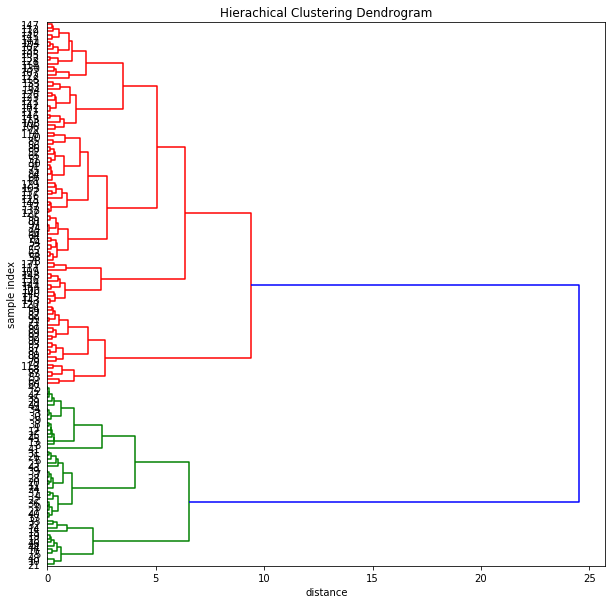

In [8]:
Z_ward = linkage(df_x, method='ward',metric="euclidean")
Z_average = linkage(df_x,method='average',metric='euclidean')
Z_Minkowski = linkage(df_x,method='average',metric='minkowski')

plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_ward,leaf_font_size=10,orientation="right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [11]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion="distance")
data["ClusterHierarchical"]=cluster_hierarchical
data.shape

(150, 6)

In [12]:
df_summary_hc = data.groupby('ClusterHierarchical').agg(["min",'mean','max'])

level0 = df_summary_hc.columns.get_level_values(0)
level1 = df_summary_hc.columns.get_level_values(1)

df_summary_hc.columns = level0+'_'+level1
df_summary_hc.reset_index(inplace=True)
df_summary_hc.round(3)

,ClusterHierarchical,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.1,5.369,5.8,3.7,3.908,4.4,1.2,1.523,1.9,0.1,0.285,0.4
1,2,4.3,4.878,5.5,2.3,3.259,3.6,1.0,1.441,1.9,0.1,0.232,0.6
2,3,4.9,5.605,6.3,2.0,2.473,2.8,3.0,3.932,5.0,1.0,1.186,1.5
3,4,6.2,6.817,7.9,3.1,3.383,3.8,5.3,5.842,6.7,2.0,2.317,2.5
4,5,5.4,6.258,7.2,2.8,3.014,3.4,3.6,4.717,6.0,1.2,1.522,2.0
5,6,4.9,6.527,7.7,2.5,2.790,3.1,4.5,5.473,6.9,1.4,1.963,2.4


In [13]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
cluster_error = []

for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(df_x)
    cluster_error.append(clus.inertia_)

df_error = pd.DataFrame({"NumberOfCluster":cluster_range,"Error":cluster_error})
df_error.round(3)

,NumberOfCluster,Error
0,1,450.000
1,2,149.564
2,3,95.319
3,4,74.274
4,5,57.661
5,6,45.851
6,7,39.111
7,8,34.092
8,9,29.584
9,10,26.756


Text(0, 0.5, 'Sum of squared distance')

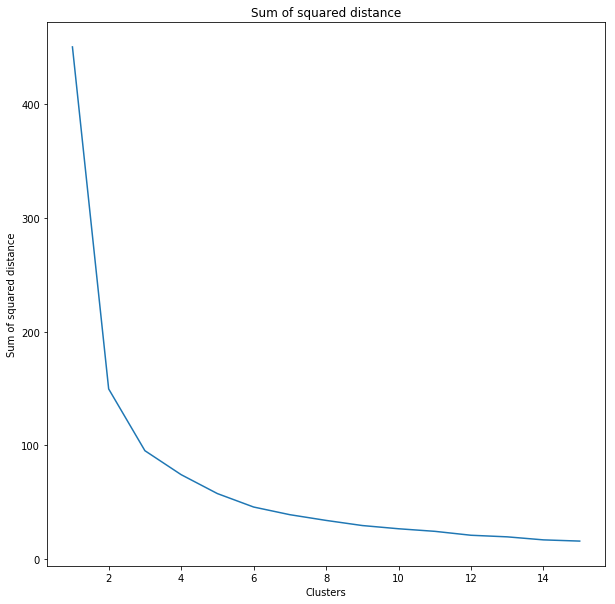

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df_error.NumberOfCluster,df_error.Error)
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [15]:
clus = KMeans(5)
clus.fit(df_x)
cluster_kmeans = [i+1 for i in clus.labels_]
data["ClusterKmeans"] = cluster_kmeans
data.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans
0,5.1,3.5,1.4,0.2,setosa,2,2
1,4.9,3.0,1.4,0.2,setosa,2,2
2,4.7,3.2,1.3,0.2,setosa,2,2
3,4.6,3.1,1.5,0.2,setosa,2,2
4,5.0,3.6,1.4,0.2,setosa,2,5


In [16]:
df_summary_km = data.drop("ClusterHierarchical",axis=1).groupby('ClusterKmeans').agg(["min",'mean','max'])

level0 = df_summary_km.columns.get_level_values(0)
level1 = df_summary_km.columns.get_level_values(1)

df_summary_km.columns = level0+'_'+level1
df_summary_km.reset_index(inplace=True)
df_summary_km.round(3)

,ClusterKmeans,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.8,6.815,7.9,2.6,3.129,3.8,4.5,5.724,6.9,1.6,2.141,2.5
1,2,4.3,4.894,5.5,2.9,3.258,3.5,1.1,1.461,1.9,0.1,0.236,0.6
2,3,5.2,6.143,7.2,2.5,2.878,3.3,3.6,4.702,5.8,1.2,1.539,2.0
3,4,4.5,5.543,6.3,2.0,2.414,2.7,1.3,3.857,5.0,0.3,1.157,1.7
4,5,4.6,5.269,5.8,3.6,3.850,4.4,1.0,1.475,1.9,0.1,0.262,0.4


In [17]:
data.columns

Index(['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH', 'SPECIES',
       'ClusterHierarchical', 'ClusterKmeans'],
      dtype='object')

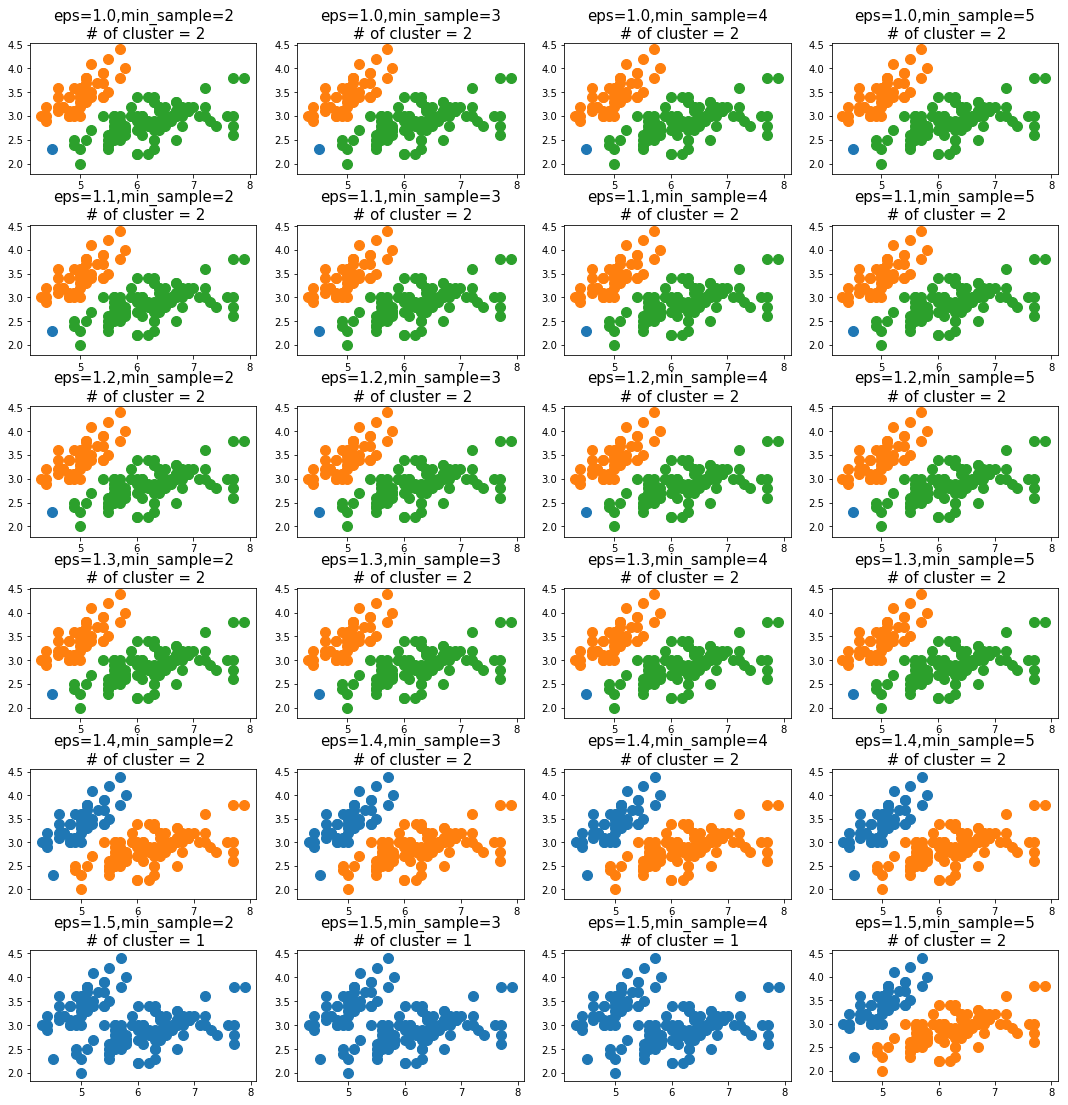

In [18]:
X = data.SEPAL_LENGTH
Y = data.SEPAL_WIDTH

makers = ["o",'v','^','s','<','>','p','D']

para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]

fig,axes = plt.subplots(len(para_eps),len(para_min_sample),figsize = (15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i,eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample,eps=eps)
        clusters = dbscan.fit_predict(df_x)
        clusters = clusters +1
        
        for (n_clus, clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluster = "+str(max(clusters)),fontsize=15)
            

In [20]:
dbscan = DBSCAN(eps=1.4,min_samples=2).fit(df_x)
cluster_dbscan = dbscan.labels_

for i,val in enumerate(cluster_dbscan):
    if val <0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
        
data["ClusterDBScan"] = cluster_dbscan
data.head()   

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,5.1,3.5,1.4,0.2,setosa,2,2,1
1,4.9,3.0,1.4,0.2,setosa,2,2,1
2,4.7,3.2,1.3,0.2,setosa,2,2,1
3,4.6,3.1,1.5,0.2,setosa,2,2,1
4,5.0,3.6,1.4,0.2,setosa,2,5,1


In [21]:
df_summary_db = data.drop(['ClusterHierarchical','ClusterKmeans'],axis=1).groupby("ClusterDBScan").agg(['min','mean','max'])
level0 = df_summary_db.columns.get_level_values(0)
level1 = df_summary_db.columns.get_level_values(1)

df_summary_db.columns = level0+'_'+level1
df_summary_db.reset_index(inplace=True)
df_summary_db.round(3)

,ClusterDBScan,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
1,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5


In [3]:
data.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df_y = data.SPECIES
df_x = data.drop("SPECIES",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (105, 4)
train data Y size: (105,)
test data X size: (45, 4)
test data Y size: (45,)


In [14]:
tree_uncustomized1 = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10,criterion='gini')
tree_uncustomized1.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 0.962
Accucary on test set: 0.956


In [16]:
tree_uncustomized2 = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10,criterion='entropy')
tree_uncustomized2.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(tree_uncustomized2.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(tree_uncustomized2.score(df_test_x,df_test_y)))

Accucary on training set: 0.962
Accucary on test set: 0.956


In [18]:
1-(26+455)/499

0.03607214428857719

In [19]:
455/468

0.9722222222222222

In [20]:
26/31

0.8387096774193549